<img src="../logo.png" align="right" width="150" />

#### Teoría de Circuitos II

# Trabajo Semanal 5
#### *Tobias Bavasso Piizzi*

La resolución detallada se puede encontrar [aquí](https://gitlab.frba.utn.edu.ar/tbavassopiizzi/tcii/-/blob/master/Tareas-Semanales/TrabajoSemanal5/TareaSemanal5.pdf) 



## Consigna

Se debe diseñar un filtro pasa-altos, que presente máxima planicidad en la banda de paso (frecuencia de corte = 300 Hz) y un cero de transmisión en 100 Hz. El prototipo pasabajos normalizado presenta la siguiente respuesta:

<img src="./con1.png" align="center" width="500" />
 
+ Determine la expresión de H(s) del filtro pasa-altos normalizado                    
+ Realizar el diagrama de polos y ceros de H(s)                                             
+ Sintetice el circuito del filtro pedido. Se utilizará para la estructura de segundo orden el siguiente circuito:

<img src="./con2.png" align="center" width="500" />


### Qué conozco de los gráficos??

+ La fase está cayendo a $\frac{135°}{dec}$ lo cual quiere decir que tenemos __*3 polos en nuestra transferencia LowPass Normalizada*__.

+ Sabiendo que el tipo de respuesta es de __*máxima planicidad*__ muy fácilmente ya podemos conocer la __*ubicación de los polos*__.

+ También vemos que la fase y el módulo nos indican la presencia de un par de __*ceros complejos conjugados*__

### Transferencia

Con todo lo mencionado anteriormente podemos esbozar nuestra TF.

\begin{equation}
\label{eqn:n1}\tag{1}
T_{LP(s)} = \frac{1}{9} \cdot \frac{1}{s + 1} \cdot \frac{s^{2} + 3}{s^{2} + s + 1} 
\end{equation}

### SImulación matemática

Observamos que los gráficos obtenidos coinciden con nuestra plantilla

<IPython.core.display.Math object>

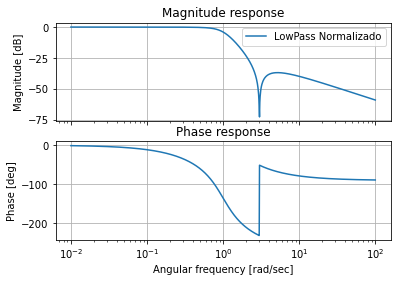

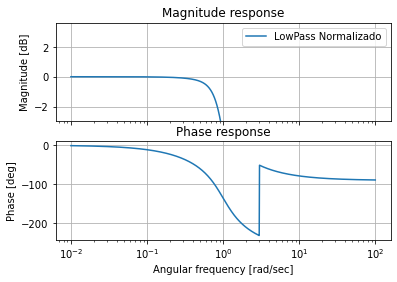

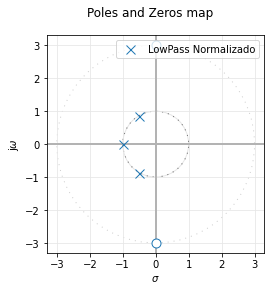

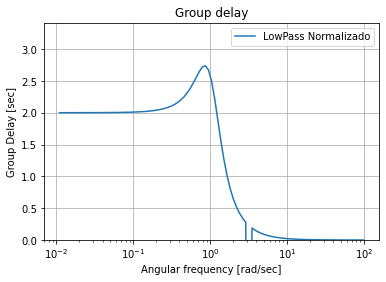

In [2]:
import scipy.signal as sig
import matplotlib as mpl
from splane import analyze_sys, pretty_print_lti
import numpy as np

z = [3j , -3j]
p = [-1 , ((-1/2) + 1j*np.sqrt(3)/2) , ((-1/2) -1j*np.sqrt(3)/2) ]
k = 1/9

num,den   = sig.zpk2tf(z,p,k)
tf   = sig.TransferFunction(num,den)
analyze_sys( [tf], ["LowPass Normalizado" ])

this_lti = sig.ZerosPolesGain(z, p, k).to_tf()

pretty_print_lti(this_lti)

### Lp to Hp

Ahora si deaseamos transformar nuestra plantilla debemos __*mapear las frecuencias con el núcleo de transformación*__.

\begin{equation}
\label{eqn:n2}\tag{2}
T_{HP(s)} = T_{LP(s)_{s = 1/s}} = \frac{s}{s + 1} \cdot \frac{s^{2} + \frac{1}{9}}{s^{2} + s + 1} 
\end{equation}

### Simulación matemática

Ahora veremos como es nuestra transferencia HighPass normalizada. Una cosa interesante a destacar es que lógicamente el efecto de las singularidades que en un principio se presentaban a 3 Hz, ahora luego de aplicar el núcleo de transformación aparecen en 1/3 Hz. Luego de desnormalizar el circuito el cero de transmisión coincidirá con la frecuencia de 33.33 Hz

<IPython.core.display.Math object>

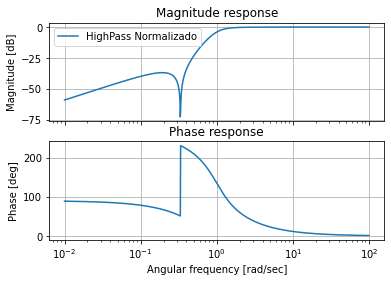

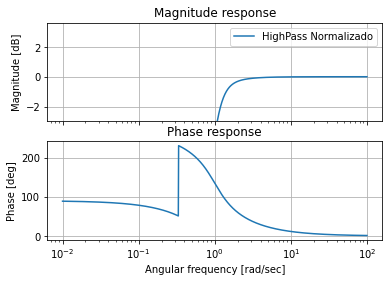

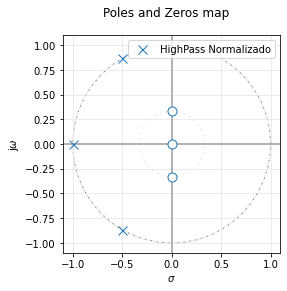

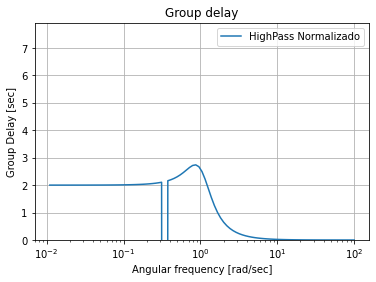

In [4]:
num_hp,den_hp = sig.lp2hp(num, den)
tf_hp   = sig.TransferFunction(num_hp,den_hp)

analyze_sys( [tf_hp], ["HighPass Normalizado" ])

this_lti = tf_hp

pretty_print_lti(this_lti)

### Circuito

<img src="./con2.png" align="center" width="500" />

Luego de operar como en el manuscrito llegamos a que

\begin{equation}
\label{eqn:n3}\tag{3}
T_{(s)} = \frac{s^{2} + \frac{R1 - R2}{C^{2} \cdot R1 \cdot R2 \cdot R3}}{s^{2} + s \cdot \frac{1}{C \cdot R1} + \frac{1}{C^{2} \cdot R2 \cdot R3}}
\end{equation}

Es muy importante notar que __*R1 debe ser mayor a R2*__ si queremos que los ceros sean __*complejos conjugados*__. Si no respetaramos esta condición estaríamos poniendo ceros sobre el eje real, o incluso si tuvieran el mismo valor nos encontraríamos con un cero de multiplicidad 2 en el origen.

Con esta celda haremos la parte activa y luego conectaremos en __*cascada un simple Filtro HighPass CR*__ 

$\Omega z = 1k \Omega$
$\Omega w = 2 \cdot \pi \cdot 100Hz$

| Compo  | Valor | $\Omega$ |
| -- | -- | -- |
| C | 1 | 1.59 uf | 
| R1 | 1 | 1k$\Omega$ |
| R2 | 8/9 | 888$\Omega$ |
| R3 | 9/8 | 1.125k$\Omega$ |
| R1 | 1 | 1k$\Omega$ |

| Compo  | Valor | $\Omega$ |
| -- | -- | -- |
| C | 1 | 1.59 uf | 
| R | 1 | 1k$\Omega$ |


### Simulación Circuital

<img src="./circuit.png" align="center" width="1000" />

<img src="./simu.png" align="center" width="1000" />

Finalmente vemos que el filtro se comporta como deseabamos